(1470, 35)
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLeve

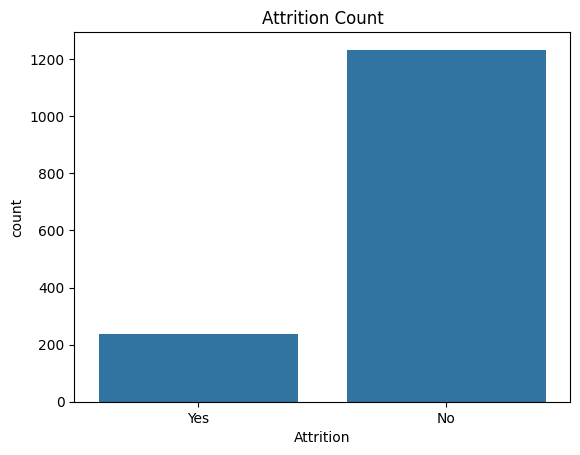

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data/rawdataset.csv")

# Quick overview
print(df.shape)
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Target distribution
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count")
plt.show()


In [2]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [3]:
from sklearn.preprocessing import StandardScaler

# Convert target column to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Drop columns not useful for prediction
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Optional: scale numeric features
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Attrition')
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Define features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']


In [4]:
import mlflow
mlflow.set_experiment("hr-employee-attrition")


<Experiment: artifact_location='file:///c:/Users/lenovo/Desktop/MASTERS/Data%20Science%20for%20production/Project/mlruns/793177091540321034', creation_time=1743555086171, experiment_id='793177091540321034', last_update_time=1743555086171, lifecycle_stage='active', name='hr-employee-attrition', tags={}>

In [7]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Models to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Start MLflow experiment
mlflow.set_experiment("hr-employee-attrition")

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        acc = accuracy_score(y_test, preds)
        prec = precision_score(y_test, preds)
        rec = recall_score(y_test, preds)
        f1 = f1_score(y_test, preds)

        # Log params and metrics
        mlflow.log_param("model_type", name)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision", prec)
        mlflow.log_metric("recall", rec)
        mlflow.log_metric("f1_score", f1)

        # Log the model artifact
        mlflow.sklearn.log_model(model, artifact_path="model", registered_model_name="AttritionPredictor")

        print(f"{name}: Accuracy={acc:.4f}, F1-Score={f1:.4f}")


2025/04/02 03:52:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'AttritionPredictor'.
Created version '1' of model 'AttritionPredictor'.


Logistic Regression: Accuracy=0.8878, F1-Score=0.5075


2025/04/02 03:53:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'AttritionPredictor' already exists. Creating a new version of this model...
Created version '2' of model 'AttritionPredictor'.


Random Forest: Accuracy=0.8741, F1-Score=0.1778


2025/04/02 03:53:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'AttritionPredictor' already exists. Creating a new version of this model...
Created version '3' of model 'AttritionPredictor'.


Gradient Boosting: Accuracy=0.8707, F1-Score=0.2692


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [03:53:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025/04/02 03:53:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'AttritionPredictor' already exists. Creating a new version of this model...
Created version '4' of model 'AttritionPredictor'.


XGBoost: Accuracy=0.8844, F1-Score=0.4138


2025/04/02 03:53:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'AttritionPredictor' already exists. Creating a new version of this model...
Created version '5' of model 'AttritionPredictor'.


Support Vector Machine: Accuracy=0.8844, F1-Score=0.2273


2025/04/02 03:53:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'AttritionPredictor' already exists. Creating a new version of this model...
Created version '6' of model 'AttritionPredictor'.


K-Nearest Neighbors: Accuracy=0.8673, F1-Score=0.1333


2025/04/02 03:54:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'AttritionPredictor' already exists. Creating a new version of this model...


Decision Tree: Accuracy=0.7619, F1-Score=0.1860


Created version '7' of model 'AttritionPredictor'.


In [ ]:
import dagshub
dagshub.init(repo_owner='ghidayaghi', repo_name='HR-Employee-Attrition', mlflow=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === STEP 4: Predict Function for New Employees ===
def predict_attrition(input_dict):
    # Convert dict to DataFrame
    new_data = pd.DataFrame([input_dict])
    new_data = pd.get_dummies(new_data)

    # Align to training data columns
    new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

    # Reuse numeric columns from training
    numeric_cols_train = X_train.select_dtypes(include=['float64', 'int64']).columns
    new_data[numeric_cols_train] = scaler.transform(new_data[numeric_cols_train])

    pred = model.predict(new_data)[0]
    proba = model.predict_proba(new_data)[0][1]

    return {"Attrition": "Yes" if pred == 1 else "No", "Probability": round(proba, 3)}

# === Example Usage ===
example_employee = {
    "Age": 45,
    "BusinessTravel": "Non-Travel",
    "Department": "Research & Development",
    "DistanceFromHome": 3,
    "EducationField": "Life Sciences",
    "Gender": "Female",
    "JobRole": "Laboratory Technician",
    "MaritalStatus": "Married",
    "MonthlyIncome": 9000,
    "OverTime": "No",
    "JobSatisfaction": 4,
    "EnvironmentSatisfaction": 4,
    "YearsAtCompany": 10,
    "JobLevel": 3,
    "TrainingTimesLastYear": 3,
    "WorkLifeBalance": 4,
    "YearsInCurrentRole": 6,
    "YearsWithCurrManager": 5
}
print(predict_attrition(example_employee))



{'Attrition': 'No', 'Probability': 0.015}
